# ASA - Rute Kurir dengan Brute Force

## Import Library

In [25]:
%pip install pyvis
from pyvis.network import Network

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# Python3 program to implement traveling salesman
# problem using naive approach.
from sys import maxsize
from itertools import permutations
from IPython.display import display
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time

## Functions

In [27]:
def visitAllNodes(graph, startingNode, graphSize):
    nodeList = [] # list node path
    shortestPath = [] # list shortest path
    vertex = [] # store all vertex apart from source vertex
    countPath = 0 # number of path

    for i in range(graphSize):
        if i != startingNode:
            vertex.append(i)
    
    min_path = maxsize
    next_permutation=permutations(vertex)
    for li in next_permutation:
        print(li)
        # store current Path weight(cost)
        current_pathweight = 0
 
        # compute current path weight
        k = startingNode
        nodeList.append(k) # append node pertama
        for j in li:
            # cek apakah terdapat edge dan node belum ada di listNode
            if(graph[k][j] != 0 and graph[k][j] not in nodeList):
                current_pathweight += graph[k][j]
                nodeList.append(j)
                k = j
        # if(graph[k][s] != 0):
        #     current_pathweight += graph[k][s]
        #     nodeList.append(s)

        if(len(nodeList)==graphSize):
            countPath +=1
            print("{}.\tRute node yang dilewati: {} | Total jarak: {}".format(countPath, nodeList, current_pathweight))
        
            # update minimum
            if(min_path > current_pathweight):        
                min_path = min(min_path, current_pathweight)
                shortestPath.clear()
                # for node in nodeList:
                #     shortestPath.append(node)
                shortestPath = nodeList.copy()
        
        # clear nodeList
        nodeList.clear()

    return shortestPath, min_path

In [28]:
def drawGraph(matrix):
  # G = nx.from_numpy_matrix(matrix)
  G = nx.from_numpy_array(matrix)
  plt.figure(figsize=(10,10))
  # pos=nx.nx_agraph.graphviz_layout(G)
  pos=nx.kamada_kawai_layout(G)
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx(G, with_labels=True, node_color='#7d99f5', pos=pos)
  display('Edges: (Pos(x,y), Weight)')
  display(nx.draw_networkx_edge_labels(G,pos,edge_labels=labels))

In [29]:
def addPath(matrix, path):
  G = nx.from_numpy_array(matrix)
  plt.figure(figsize=(10,10))
  # pos=nx.nx_agraph.graphviz_layout(G)
  pos=nx.kamada_kawai_layout(G)
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx(G, with_labels=True, node_color='#7d99f5', pos=pos)
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

  nx.set_edge_attributes(G, '#000000','color')

  for i, node in enumerate(path):
    if i == len(path):
      break
    if i == 0:
      before = node
      continue
    G[before][node]['color'] = 'g'
    before = node

  # display(G.edges.data())

  colors = nx.get_edge_attributes(G,'color').values()
  nx.draw(G, pos, 
        edge_color=colors,
        width=3,
        with_labels=True)

In [30]:
def visualize(G, SG):
    N = Network(notebook=True, height='1080px', width='1920px', bgcolor='#222222', font_color='white')
    N.force_atlas_2based()
    N.show_buttons(filter_=["physics"])
    # uncomment the following if the graph is large
    # N.barnes_hut(spring_strength=0.006)

    for n in G:
        N.add_node(n, label=str(n))

    for e in G.edges.data():
        if e in SG.edges:  # if the edge is part of sub-graph
            color = 'green'
            label = str(e[2]['weight'])
            size = 2
        else:
            color = 'red'
            label = ''
            size = 1
        N.add_edge(int(e[0]), int(e[1]), color=color, width=2, label=label, value=size)

    N_dir = Network(notebook=True, height='1080px', width='1920px', bgcolor='#222222', font_color='white', directed=True)
    N_dir.from_nx(SG)

    N_dir.force_atlas_2based()
    N_dir.show_buttons(filter_=["physics"])

    N.show('all.html')
    N_dir.show('directed.html')  # save a html file in current dir

In [31]:
def interactive(matrix, path):
  G = nx.from_numpy_array(matrix)
  Gk = nx.Graph()

  for i, n in enumerate(path):
    # add node
    Gk.add_node(n, label=str(n))

    # add edge
    if i == len(path):
      break
    if i == 0:
      before = n
      continue
    Gk.add_edge(before, n, label=str(G[before][n]['weight']))
    before = n
  
  visualize(G, Gk) #output berupa file html yang bisa didownload

## Main

### 10 Node

In [32]:
# data

graph = np.array([[  0,   1, 1.5,   0,   0,  .8, 1.2, 2.3,   1,   0,   0,   0,   0,   0,   0],
                      [  1,   0, 3.5, 2.5, 1.3,   0,   2, 1.7,   0, 2.5,   0,   0,   0,   0,   0],
                      [1.5, 3.5,   0,   3,   0,   0,   0,   0, 1.5, 1.7,   0,   0,   0,   0,   0],
                      [  0, 2.5,   3,   0,   1, 1.5,   0, 3.4,   0, 1.5,   0,   0,   0,   0,   0],
                      [  0, 1.3,   0,   1,   0,   0,   1,   0,   0,   0,   0, 1.8, 2.5, 1.6, 1.2],
                      [  8,   0,   0, 1.5,   0,   0,   1,   0,   0,   0,   0,   0, 1.4, 2.2,   0],
                      [1.2,   2,   0,   0,   1,   1,   0, 1.5,   0,   0, 1.9,   1,   0,   0,   0],
                      [2.3, 1.7,   0, 3.4,   0,   0, 1.5,   0, 1.3,   0, 1.6,   0,   0,   0,   0],
                      [  1,   0, 1.5,   0,   0,   0,   0, 1.3,   0,   0,   0,   0,   0,   0,   0],
                      [  0, 2.5, 1.7, 1.5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
                      [  0,   0,   0,   0,   0,   0, 1.9, 1.6,   0,   0,   0, 1.5,   0,   0,   0],
                      [  0,   0,   0,   0, 1.8,   0,   1,   0,   0,   0, 1.5,   0,   2,   0,   0],
                      [  0,   0,   0,   0, 2.5, 1.4,   0,   0,   0,   0,   0,   2,   0, 1.4, 3.5],
                      [  0,   0,   0,   0, 1.6, 2.2,   0,   0,   0,   0,   0,   0, 1.4,   0, 1.2],
                      [  0,   0,   0,   0, 1.2,   0,   0,   0,   0,   0,   0,   0, 3.5, 1.2,   0]])

shortest_path = [0, 5, 12, 11, 6, 10, 7, 8, 2, 9, 3, 4, 1]

In [33]:
matrix = graph[:5,:5]
matrix

array([[0. , 1. , 1.5, 0. , 0. ],
       [1. , 0. , 3.5, 2.5, 1.3],
       [1.5, 3.5, 0. , 3. , 0. ],
       [0. , 2.5, 3. , 0. , 1. ],
       [0. , 1.3, 0. , 1. , 0. ]])

In [34]:
visitAllNodes(graph, 0, len(matrix))

(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 3, 4)
(2, 1, 4, 3)
(2, 3, 1, 4)
1.	Rute node yang dilewati: [0, 2, 3, 1, 4] | Total jarak: 8.3
(2, 3, 4, 1)
2.	Rute node yang dilewati: [0, 2, 3, 4, 1] | Total jarak: 6.8
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 2, 4, 1)
(3, 4, 1, 2)
(3, 4, 2, 1)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(4, 3, 2, 1)


([0, 2, 3, 4, 1], 6.8)

'Edges: (Pos(x,y), Weight)'

{(0, 1): Text(0.38704042625654667, 0.23133519105807454, '1.0'),
 (0, 2): Text(0.02578054410043465, 0.7546716338356421, '1.5'),
 (1, 2): Text(0.04865712041201503, 0.4766635572224324, '3.5'),
 (1, 3): Text(-0.046574838938012675, -0.4116905167981611, '2.5'),
 (1, 4): Text(0.2257527961216415, -0.3663175598150485, '1.3'),
 (2, 3): Text(-0.40783472109412466, 0.11164592597940637, '3.0'),
 (3, 4): Text(-0.2307390453844982, -0.7313351910580745, '1.0')}

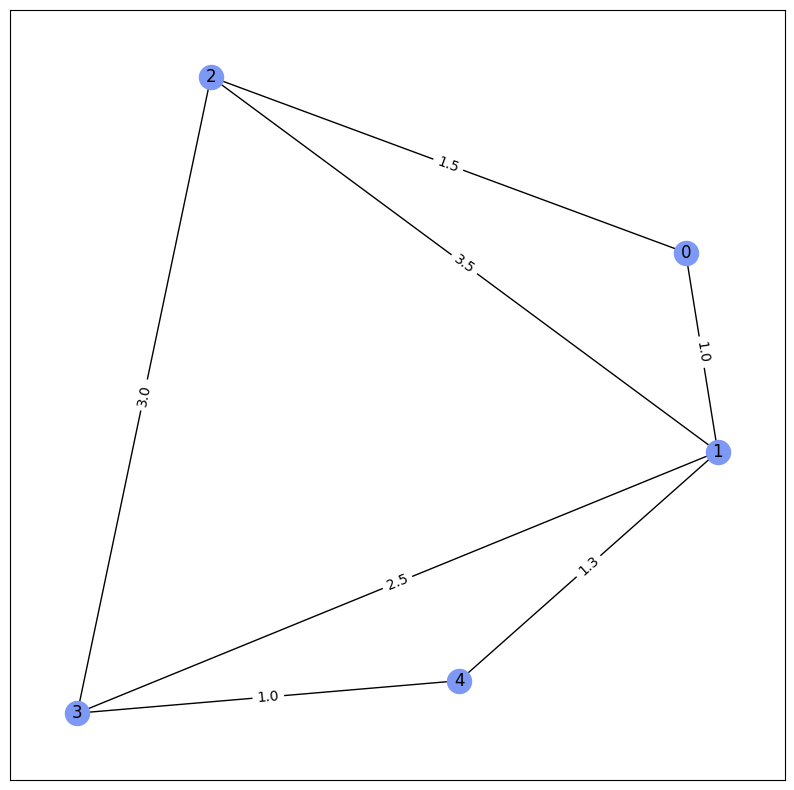

In [35]:
drawGraph(matrix)

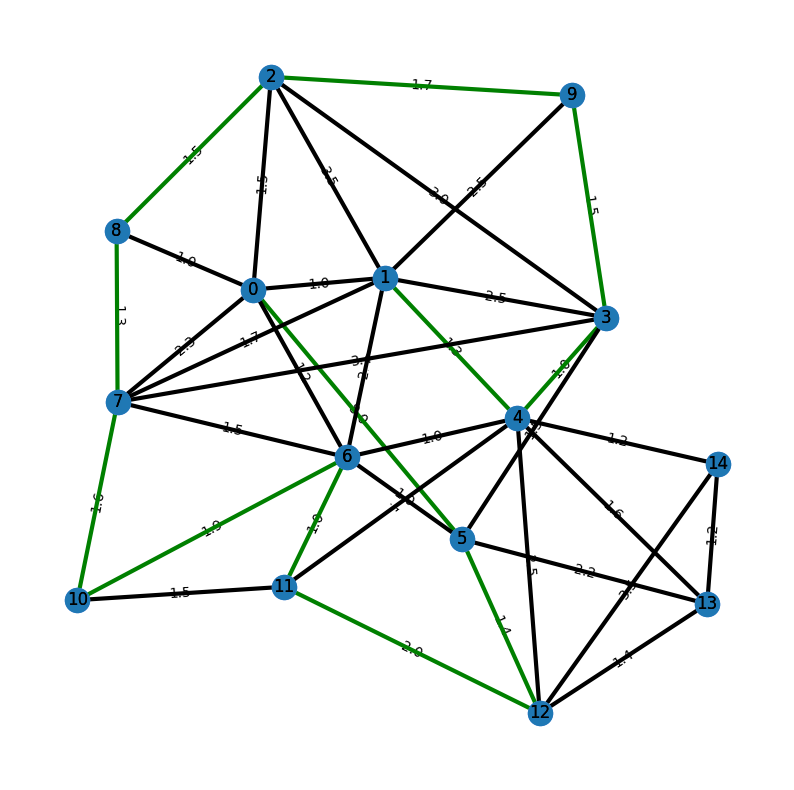

In [36]:
addPath(graph, shortest_path)

In [37]:
interactive(graph, shortest_path)

all.html
directed.html
